<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:#0097da;overflow:hidden;font-weight:800">Diabetes Mortality 1999 - 2016</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-mortality-1999-2016/Diabetes_Mortality_1999_2016.csv


## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:80px;font-size:110%;text-align: center'>1  |  About This Kernel</div></b>

**This kernel aims to visually analyze how diabetes mortality behaves compared to several variables. Furthermore, we will use the Random Forest algorithm to predict mortality depending on these variables. I hope you enjoy it.**

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:80px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import locale
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
#Read data from a csv file
data = pd.read_csv('/kaggle/input/diabetes-mortality-1999-2016/Diabetes_Mortality_1999_2016.csv', sep = ',')

In [4]:
# Check dataset
data

,State,State Code,Age Group,Age Group Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate,% of Total Deaths
0,Alabama,1,25-34 years,25-34,2010,2010,Female,F,White,2106-3,13,204528,6.3561 (Unreliable),0.0010%
1,Alabama,1,25-34 years,25-34,2015,2015,Female,F,Black or African American,2054-5,13,100125,12.9838 (Unreliable),0.0010%
2,Alabama,1,35-44 years,35-44,1999,1999,Female,F,Black or African American,2054-5,12,96322,12.4582 (Unreliable),0.0009%
3,Alabama,1,35-44 years,35-44,1999,1999,Male,M,Black or African American,2054-5,16,79364,20.1603 (Unreliable),0.0012%
4,Alabama,1,35-44 years,35-44,1999,1999,Male,M,White,2106-3,20,251701,7.9459,0.0015%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,Wyoming,56,85+ years,85+,2014,2014,Male,M,White,2106-3,15,3701,405.2959 (Unreliable),0.0011%
15098,Wyoming,56,85+ years,85+,2015,2015,Female,F,White,2106-3,20,6286,318.1674,0.0015%
15099,Wyoming,56,85+ years,85+,2015,2015,Male,M,White,2106-3,13,3793,342.7366 (Unreliable),0.0010%
15100,Wyoming,56,85+ years,85+,2016,2016,Female,F,White,2106-3,13,6355,204.5633 (Unreliable),0.0010%


## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [5]:
# Check Dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15102 entries, 0 to 15101
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              15102 non-null  object
 1   State Code         15102 non-null  int64 
 2   Age Group          15102 non-null  object
 3   Age Group Code     15102 non-null  object
 4   Year               15102 non-null  int64 
 5   Year Code          15102 non-null  int64 
 6   Gender             15102 non-null  object
 7   Gender Code        15102 non-null  object
 8   Race               15102 non-null  object
 9   Race Code          15102 non-null  object
 10  Deaths             15102 non-null  int64 
 11  Population         15102 non-null  int64 
 12  Crude Rate         15102 non-null  object
 13  % of Total Deaths  15102 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
# Null Data
print("Number of Null Data: " + str(data.isna().sum().sum()))

Number of Null Data: 0


In [7]:
# Check duplicate data
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 0


In [8]:
data.nunique()

State                   51
State Code              51
Age Group                8
Age Group Code           8
Year                    18
Year Code               18
Gender                   2
Gender Code              2
Race                     4
Race Code                4
Deaths                 653
Population           14582
Crude Rate           15038
% of Total Deaths      525
dtype: int64

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

**Let's analyze the behavior of the "Deaths" variable in relation to the other variables in the dataset.**

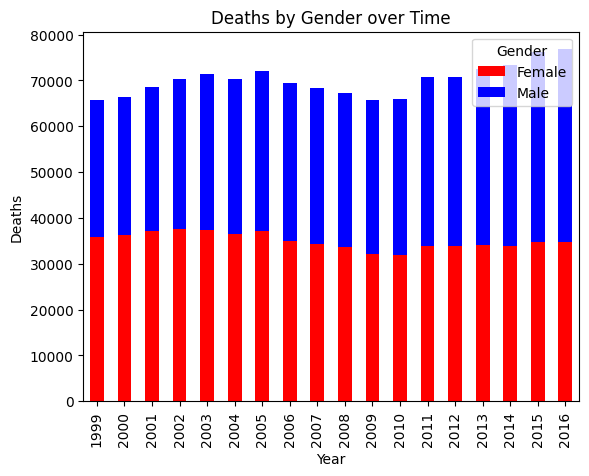

In [9]:
# Deaths by Gender over Time

df = pd.DataFrame(data)

# Pivot_table
pivot_table = pd.pivot_table(df, values="Deaths", index=["Year"], columns=["Gender"], aggfunc="sum")

# Plot
pivot_table.plot(kind="bar", stacked=True, color=["red", "blue"])
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by Gender over Time")
plt.legend(title="Gender")
plt.show()

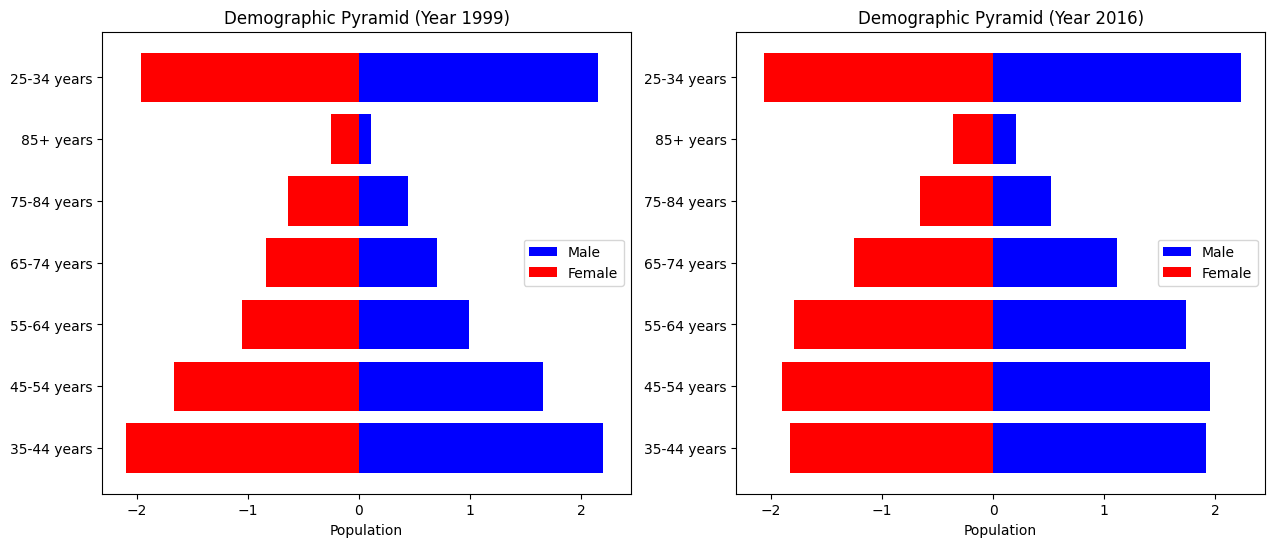

In [10]:
# Population X Gender - 1999 and 2016

# df_male and df_female
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Demographic Pyramid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Demographic Pyramid (Year 1999) 
ax1.barh(df_male[df_male['Year'] == 1999]['Age Group'], df_male[df_male['Year'] == 1999]['Population']/1000000, color='blue', label='Male')
ax1.barh(df_female[df_female['Year'] == 1999]['Age Group'], -df_female[df_female['Year'] == 1999]['Population']/1000000, color='red', label='Female')
ax1.set_title('Demographic Pyramid (Year 1999)')
ax1.set_xlabel('Population')
ax1.legend()

# Demographic Pyramid (Year 2016)
ax2.barh(df_male[df_male['Year'] == 2016]['Age Group'], df_male[df_male['Year'] == 2016]['Population']/1000000, color='blue', label='Male')
ax2.barh(df_female[df_female['Year'] == 2016]['Age Group'], -df_female[df_female['Year'] == 2016]['Population']/1000000, color='red', label='Female')
ax2.set_title('Demographic Pyramid (Year 2016)')
ax2.set_xlabel('Population')
ax2.legend()

plt.show()

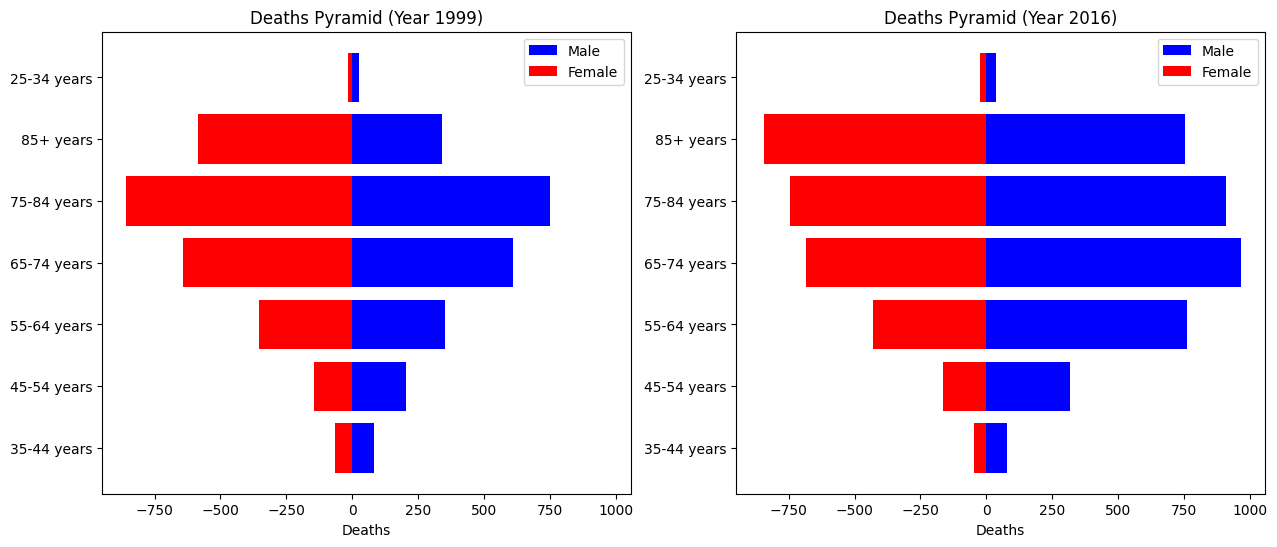

In [11]:
# Deaths X Gender - 1999 and 2016

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Demographic Pyramid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)


# Demographic od Deaths Pyramid (Year 1999)
ax1.barh(df_male[df_male['Year'] == 1999]['Age Group'], df_male[df_male['Year'] == 1999]['Deaths'], color='blue', label='Male')
ax1.barh(df_female[df_female['Year'] == 1999]['Age Group'], -df_female[df_female['Year'] == 1999]['Deaths'], color='red', label='Female')
ax1.set_title('Deaths Pyramid (Year 1999)')
ax1.set_xlabel('Deaths')
ax1.legend()

# Demographic od Deaths Pyramid (Year 2016)
ax2.barh(df_male[df_male['Year'] == 2016]['Age Group'], df_male[df_male['Year'] == 2016]['Deaths'], color='blue', label='Male')
ax2.barh(df_female[df_female['Year'] == 2016]['Age Group'], -df_female[df_female['Year'] == 2016]['Deaths'], color='red', label='Female')
ax2.set_title('Deaths Pyramid (Year 2016)')
ax2.set_xlabel('Deaths')
ax2.legend()

plt.show()

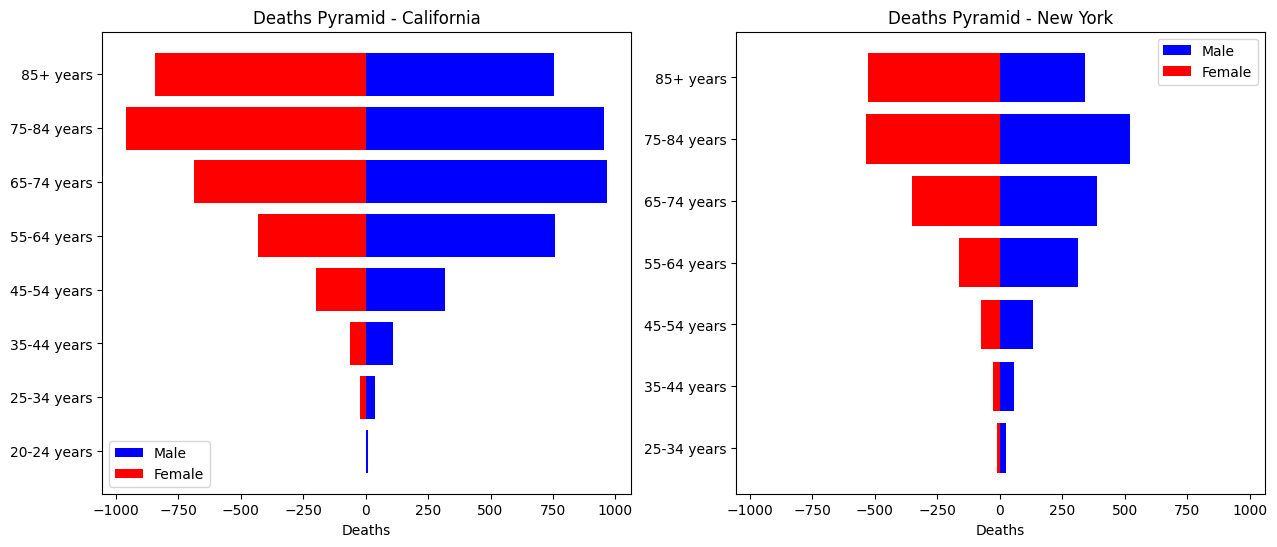

In [12]:
#Comparison of Deaths by Age Group - State (California and New York)

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Demographic Pyramid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)


# Demographic od Deaths Pyramid - California
ax1.barh(df_male[df_male['State'] == 'California']['Age Group'], df_male[df_male['State'] == 'California']['Deaths'], color='blue', label='Male')
ax1.barh(df_female[df_female['State'] == 'California']['Age Group'], -df_female[df_female['State'] == 'California']['Deaths'], color='red', label='Female')
ax1.set_title('Deaths Pyramid - California')
ax1.set_xlabel('Deaths')
ax1.legend()

# Demographic od Deaths Pyramid - New York
ax2.barh(df_male[df_male['State'] == 'New York']['Age Group'], df_male[df_male['State'] == 'New York']['Deaths'], color='blue', label='Male')
ax2.barh(df_female[df_female['State'] == 'New York']['Age Group'], -df_female[df_female['State'] == 'New York']['Deaths'], color='red', label='Female')
ax2.set_title('Deaths Pyramid - New York')
ax2.set_xlabel('Deaths')
ax2.legend()

plt.show()

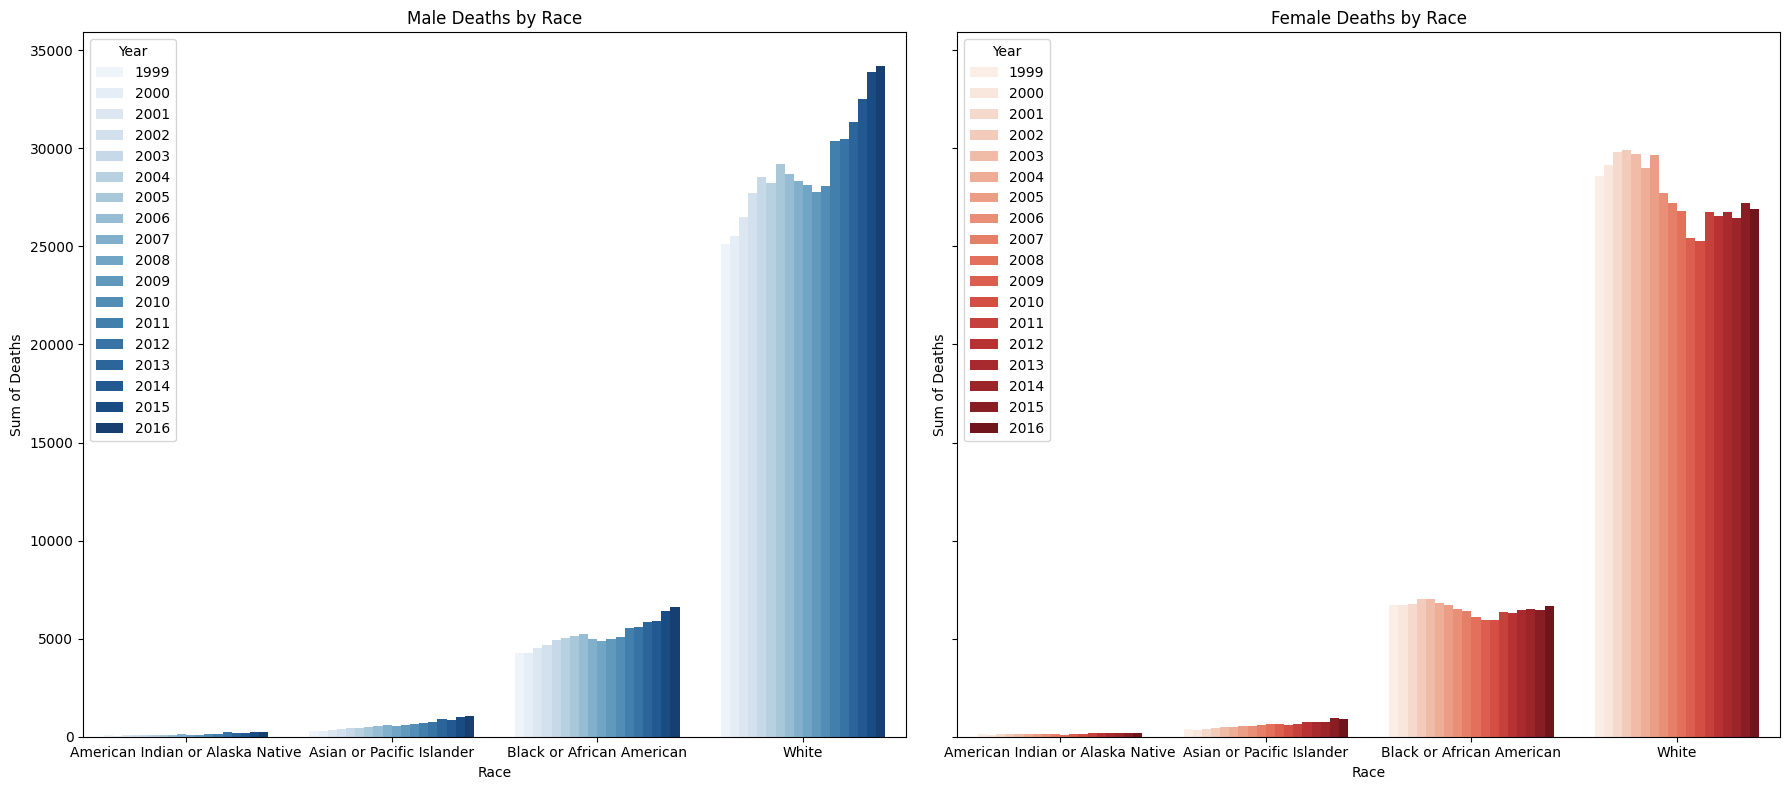

In [13]:
# Deths X Race by Year
df_summed = df.groupby(["Race", "Gender", "Year"])["Deaths"].sum().reset_index()

df_male = df_summed[df_summed["Gender"] == "Male"]
df_female = df_summed[df_summed["Gender"] == "Female"]

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharey=True)

# Barplot - Male
sns.barplot(ax=axes[0], x="Race", y="Deaths", hue="Year", data=df_male, palette="Blues")
axes[0].set_title('Male Deaths by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Sum of Deaths')

# Barplot - Female
sns.barplot(ax=axes[1], x="Race", y="Deaths", hue="Year", data=df_female, palette="Reds")
axes[1].set_title('Female Deaths by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Sum of Deaths')

plt.tight_layout()
plt.show()

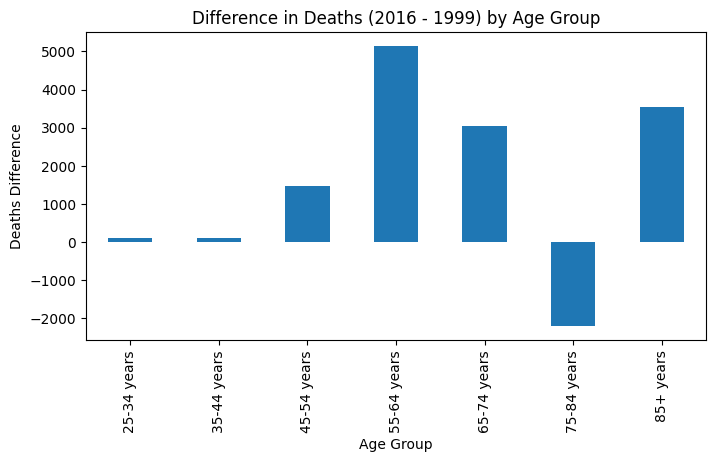

In [14]:
# Difference in Deaths (2016 - 1999) by Age Group
df_1999 = df[df["Year"] == 1999]
df_2016 = df[df["Year"] == 2016]

# Difference gropuby
df_diff = df_2016.groupby("Age Group")["Deaths"].sum() - df_1999.groupby("Age Group")["Deaths"].sum()

# Plot
df_diff.plot(kind='bar', figsize=(8, 4))
plt.title('Difference in Deaths (2016 - 1999) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths Difference')
plt.show()

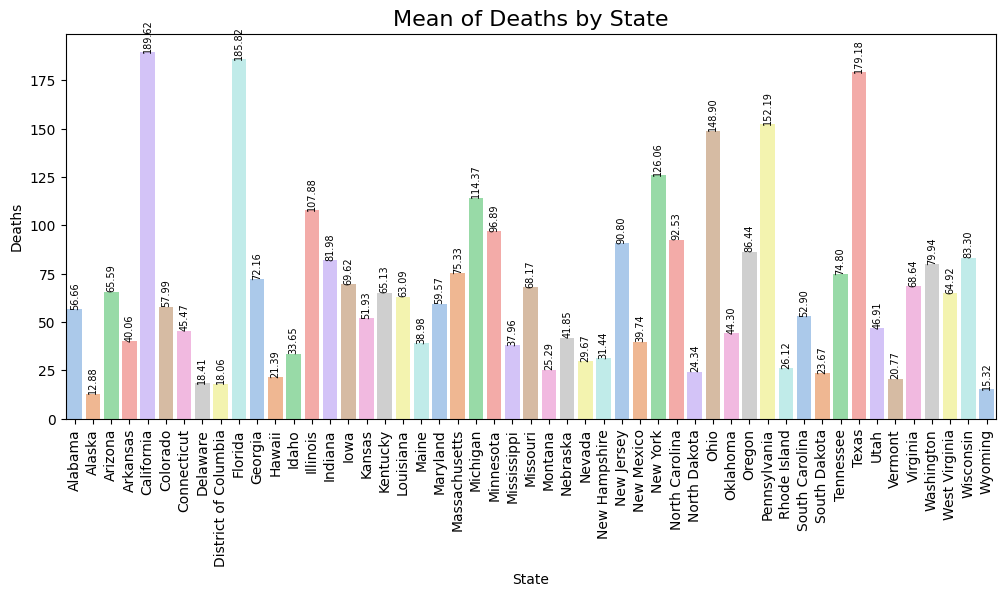

In [15]:
# Mean of Deaths by State
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=df, x="State", y="Deaths", errorbar=None, palette="pastel")
plt.title("Mean of Deaths by State", fontsize = 16)
ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 90, fontsize = 7 )
plt.xticks(rotation = 90);
plt.show()

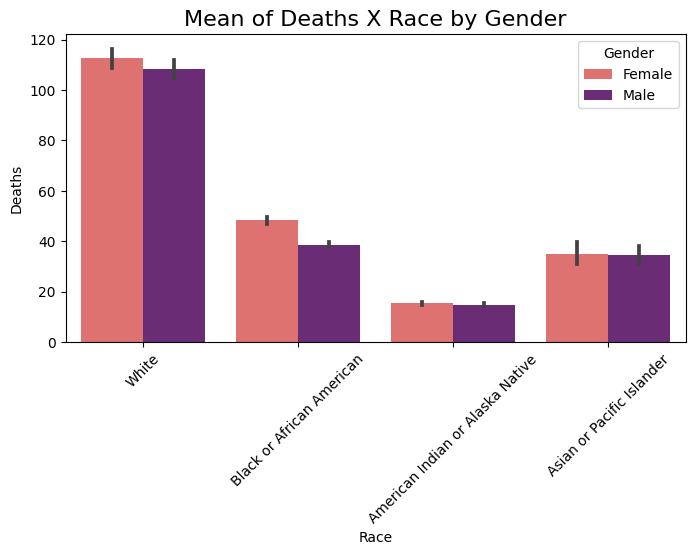

In [16]:
# Mean of Deaths X Race by Gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="Race", y="Deaths", hue="Gender", palette="magma_r")
plt.title("Mean of Deaths X Race by Gender", fontsize = 16)
plt.xticks(rotation = 45);
plt.show()

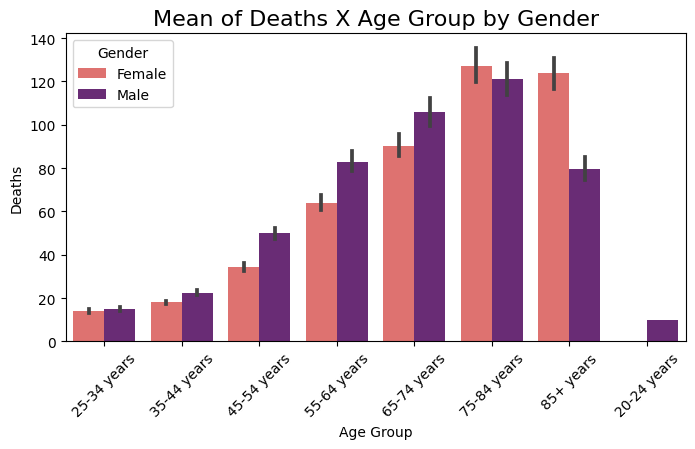

In [17]:
# # Mean of Deaths X Age Group by Gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="Age Group", y="Deaths", hue="Gender", palette="magma_r")
plt.title("Mean of Deaths X Age Group by Gender", fontsize = 16)
plt.xticks(rotation = 45);
plt.show()

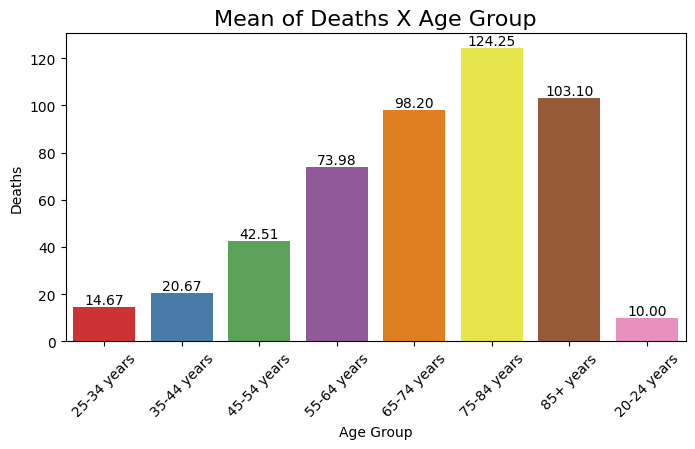

In [18]:
# Mean of Deaths X Age Group
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df, x="Age Group", y="Deaths", errorbar=None, palette="Set1")
plt.title("Mean of Deaths X Age Group", fontsize = 16)
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.xticks(rotation = 45);
plt.show()

In [19]:
# Top States according to Deaths
top_55 = df.groupby('State')['Deaths'].sum().reset_index()
top_55 = top_55.sort_values(by='Deaths', ascending=False)

top_55 = top_55.head(55)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_55['State'], y=top_55['Deaths']))

fig.update_layout(title='Top States according to Deaths',
                  xaxis_title='States',
                  yaxis_title='Deaths',
                  plot_bgcolor='#b0deba', 
                  paper_bgcolor='#b0deba',  
                  font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>6  |  RandomForestRegressor</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#0097da'> Prepare dataset to apply the algorithm.</span></b> 

In [20]:
df = df.copy()
# Remove unused label and change to 'float'
df['Crude Rate'] = df['Crude Rate'].str.replace('(Unreliable)','') 
df["Crude Rate"] = df["Crude Rate"].astype(str).astype(float)

In [21]:
# Delete unnecessary columns.
df.drop(["State", "Age Group", "Year", "Gender", "Race", "% of Total Deaths"], axis=1, inplace=True)

In [22]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15102 entries, 0 to 15101
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      15102 non-null  int64  
 1   Age Group Code  15102 non-null  int64  
 2   Year Code       15102 non-null  int64  
 3   Gender Code     15102 non-null  int64  
 4   Race Code       15102 non-null  int64  
 5   Deaths          15102 non-null  int64  
 6   Population      15102 non-null  int64  
 7   Crude Rate      15102 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 944.0 KB


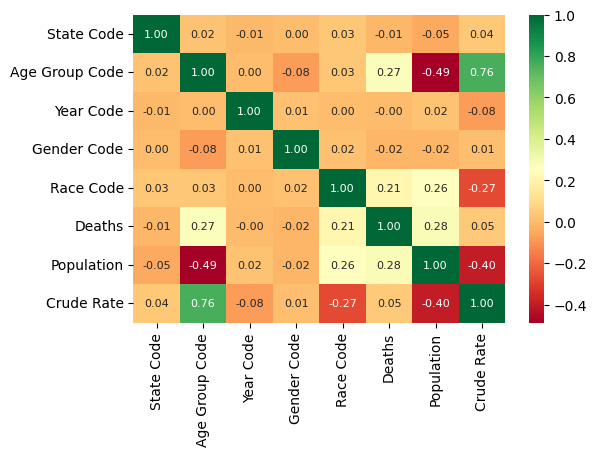

In [24]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8}, ax=ax)
plt.show()

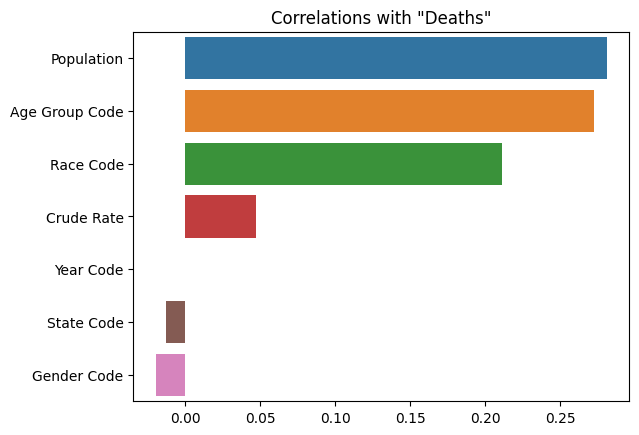

In [25]:
# Correlations with "Deaths"

limit = -1.0

data = df.corr()["Deaths"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Deaths"')
plt.show()

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#0097da'> Random Forest Regressor</span></b> 

In [26]:
# Defining y e X
y = df["Deaths"]
X = df.drop("Deaths", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12081, 7), (3021, 7), (12081,), (3021,))

In [28]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# instantiate the classifier 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)

# fit the model
rf.fit(X_train, y_train);

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [30]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [31]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'deaths.')

Mean Absolute Error: 1.45 deaths.


In [32]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.51 %.


In [33]:
# Residual with cross_val_predict
from sklearn.model_selection import cross_val_predict, cross_val_score

predicted = cross_val_predict(rf, X_train, y_train, cv=5, n_jobs=-1)
residual = y_train - predicted

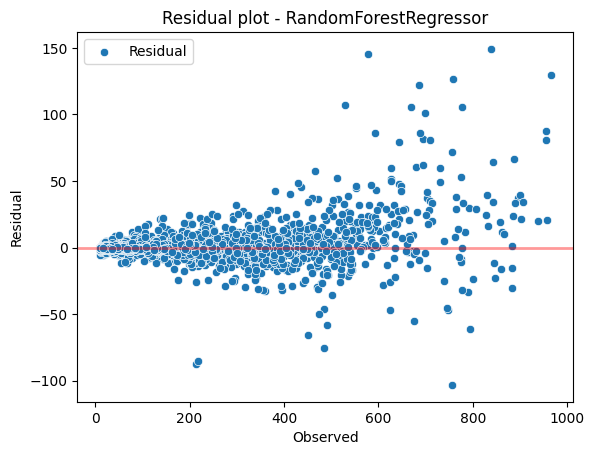

In [34]:
# Analysis of predictions using residual plot

sns.scatterplot(x=y_train, y=residual, label='Residual')
plt.axhline(lw=2, color='red', alpha=0.4)
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.title("Residual plot - RandomForestRegressor")
plt.show()

In [35]:
# Real Deaths X Predict Deaths
df_pred = pd.DataFrame(columns=["real", "predictions"])
df_pred["real"] = y_test
rf.fit(X_train, y_train)
df_pred["predictions"] = rf.predict(X_test)
df_pred

,real,predictions
439,18,17.958
14335,13,13.033
9725,147,146.956
6932,384,381.998
12206,60,60.555
...,...,...
5656,60,59.976
5487,34,34.178
2660,22,22.167
5591,116,116.178


## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>